# Introduction
In this notebook, we use the popular iris data set to learn classification techniques. 

About the dataset:
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Goal: Predict the class of the iris flower plant based on available attributes

Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

## Road map
1. Data Cleaning
2. Exploratory Data Analysis
3. Develop model and evaluate them against performance metric
4. Hyperparameter tuning of best selected model
5. Validate the model
6. Draw conclusions

## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Display options
pd.set_option('display.max_columns',30)


sns.set_style('ticks')

## Read data

In [2]:
import os
os.getcwd()

'/Users/kavyaannapareddy/Desktop/Projects/python/wip'

In [3]:
file_path= '/Users/kavyaannapareddy/Desktop/Projects/python/wip/iris.data'
iris= pd.read_csv(file_path, names=['sepal_length','sepal_width',
                                      'petal_length','petal_width','class'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

There are 150 rows of data and 5 attributes. Our target variable is class. Let's check for missing values

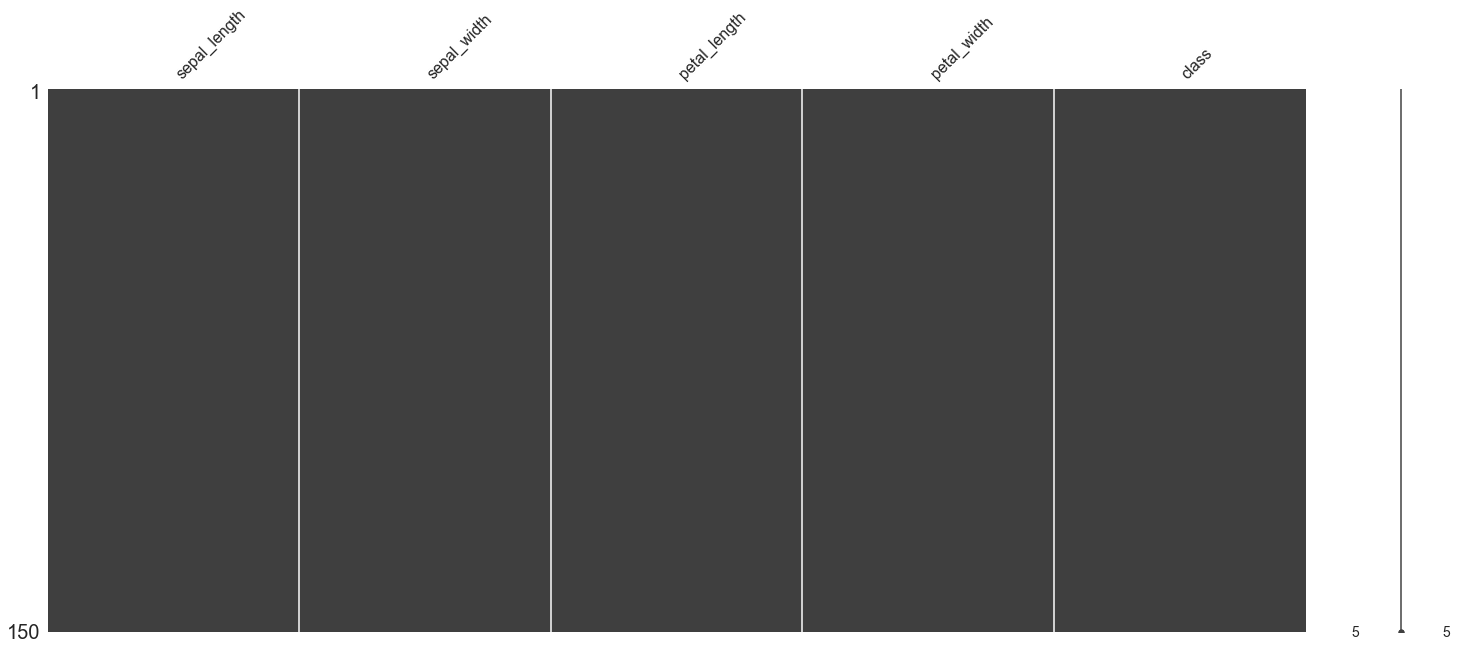

In [5]:
import missingno as mn
mn.matrix(iris)

There are no missing values. Let's look at descriptive statistics.

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The lengths of sepal and petal are distributed farther than their respective widths. Let's look the distribution of our target variable.

In [7]:
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

Our target variable has equal distribution of iris flower classes. Hence, we can sample randomly without worrying about our sample distribution representing our population.
# Exploratory Data Analysis

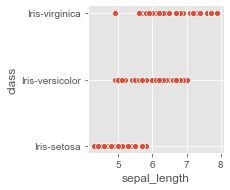

In [8]:
plt.style.use('ggplot')
sns.pairplot(x_vars = 'sepal_length', y_vars ='class', data=iris)

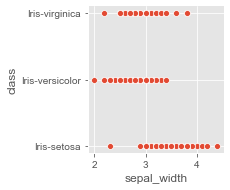

In [9]:
sns.pairplot(x_vars = 'sepal_width', y_vars ='class', data=iris)


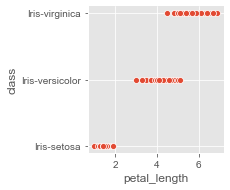

In [10]:
sns.pairplot(x_vars = 'petal_length', y_vars ='class', data=iris)


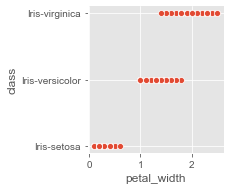

In [11]:
sns.pairplot(x_vars = 'petal_width', y_vars ='class', data=iris)

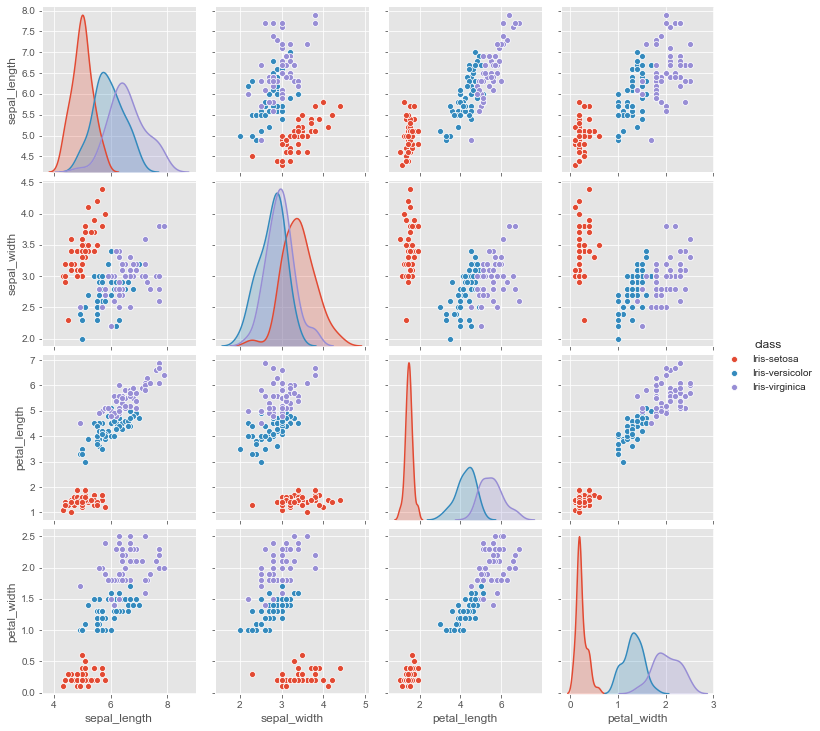

In [12]:
sns.pairplot(iris, hue='class')

We can clearly identify three different classes that the data belongs to. We will next develop a data classification model based on this training data to be able to classify any new flower into one of these flower types.

# Model Development

## Performance metric
Since our target variable classes are balanced, we use accuracy as our performance metric. It divides the no. of correct predictions( True positives and true negatives) by total kinds of predictions. 

In [13]:
from sklearn.metrics import accuracy_score

Let's split our data into train and validation datasets.
## Split dataset

In [14]:
X = iris.drop(['class'], axis=1)
y= iris['class']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2)

## Model Evaluation
We use the following classification models and choose the best as per our performance metric

1. K nearest Neighbors
2. Support Vector Machines
3. Random Forest (Decision trees)
4. Logistic Regression
5. Gaussian Naive Bayes
6. Linear Discriminant Analysis

Let's try k fold validation and choose the best model. 


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
from sklearn.svm import SVC
svc= SVC()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100)
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(solver= 'liblinear')
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
models= {'KNN':knn,'SVC':svc ,'Random Forest':rfc,'Logistic regression':clf ,
        'Naive Bayes':gnb,'LDA':lda }

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

results=[]
for model in models:
    kfold= StratifiedKFold(n_splits=10, random_state= 42, shuffle= True)
    score= cross_val_score(models[model], X_train, y_train, 
                           cv= kfold, scoring= 'accuracy')
    results.append(score)
    print('%s: %f, (%f )'%(model,np.mean(results), np.std(results)))

KNN: 0.950000, (0.066667 )
SVC: 0.958333, (0.055902 )
Random Forest: 0.947222, (0.062670 )
Logistic regression: 0.950000, (0.061237 )
Naive Bayes: 0.948333, (0.064313 )
LDA: 0.952778, (0.063404 )


From our results, we see that Support Vector Machine has the highest accuracy score along with least amount of standard deviation.

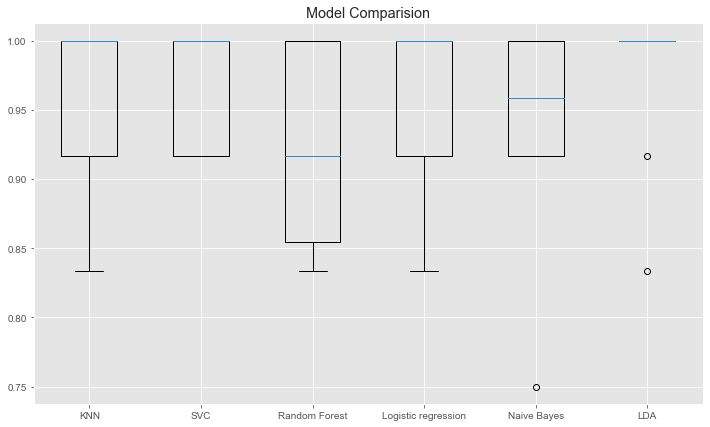

In [18]:
plt.figure(figsize= (12,7))
plt.title('Model Comparision')
plt.boxplot(results, labels= models.keys())
plt.show()

# Hyperparameter Tuning
We saw that SVC has the best performance. We use gridsearchcv for tuning the estimator

In [ ]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid= {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'gamma': [0.001, 0.01, 0.1, 1], 
            'kernel': ['linear', 'rbf','poly']}
grid= GridSearchCV(svc, param_grid, cv=5, refit=True, verbose= 3)

# fitting the model for grid search
grid.fit(X_train, y_train)


In [24]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


# Validate the model

In [21]:
grid_pred= grid.predict(X_valid)

# print classification report
from sklearn.metrics import classification_report
classification_report(grid_pred, y_valid)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       1.00      1.00      1.00        12\n Iris-virginica       1.00      1.00      1.00         8\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n'

                       precision    recall  f1-score   support
        Iris-setosa       1.00      1.00      1.00        10
    Iris-versicolor       1.00      1.00      1.00        12
     Iris-virginica       1.00      1.00      1.00         8
           accuracy                           1.00        30
          macro avg       1.00      1.00      1.00        30
       weighted avg       1.00      1.00      1.00        30

# Conclusion
We have used the iris dataset to learn classification techniques. 

We have particularly learned using kfold for cross validation, gridsearch cv for hyperparameter tuning and used it to tune our model to achieve 100 percent accuracy. These results could be attributed to the nature of the dataset. 